# Data

## Packages

Import all the packages.

In [63]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
dat = pd.read_csv('F:\Lab\Majo Data\SKMEL-shape descriptors.csv', header = 0)

In [4]:
data = dat.copy()

## Understand data

After loading the data, the next step is to understand what kind of data it is. It is important to know what each feature is. All the information will help us to preprocess the data before modeling.

Understanding from these parts: the total number of features, the type of features, the correlation among these features, missing value and basic statistics for each features.

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HPI       289 non-null    int64  
 1   Extr      289 non-null    int64  
 2   Region    289 non-null    object 
 3   area      289 non-null    int64  
 4   Perim     289 non-null    float64
 5   Mayor     289 non-null    float64
 6   Minor     289 non-null    float64
 7   Circ      289 non-null    float64
 8   Ar        289 non-null    float64
 9   Round     289 non-null    float64
 10  Solidity  289 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 25.0+ KB


From above:

- Data has one object value, three int values and seven float values.  
- No variable columns has null/missing values.  
- The shape of this data is (289, 11). 

Next step, we will go deep inside these features from different parts.

- **Categorical features** 

>- HPI

In our data, there is a special feature, HPI. This is an ordinal feature. We need to check how many levels it includes. 

In [51]:
levels = data.HPI.unique()
print("the number of levels = " + str(len(levels)))
print("levels = " + str(levels))

the number of levels = 4
levels = [24 72 96 48]


>- Region

Another categorical feature in our data is Region.

In [55]:
regions = data['Region '].unique()
print("the number of regions = " + str(len(regions)))
print("regions = " + str(regions))

the number of regions = 5
regions = ['CV' 'PL' 'AVJ' 'ISV' 'DA']


- **Numerical features** 

Firstly, using df.describe() function to get the basic information about all the numerical features exclude HPI.

In [60]:
numerics = data.drop(['Extr', 'HPI', 'Region '], axis = 1)
numerics.describe()

,area,Perim,Mayor,Minor,Circ,Ar,Round,Solidity
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,5161.757785,530.465426,111.412453,52.034671,0.368934,2.198529,0.598536,0.818540
std,5464.460727,459.618965,83.921854,20.245338,0.265239,1.543613,0.245184,0.121262
min,36.000000,22.971000,7.197000,6.369000,0.028000,1.020000,0.093000,0.336000
25%,1940.000000,232.872000,58.278000,39.014000,0.141000,1.223000,0.397000,0.760000
50%,3501.000000,398.198000,84.804000,51.406000,0.293000,1.576000,0.635000,0.840000
75%,6081.000000,617.176000,131.972000,62.822000,0.564000,2.517000,0.818000,0.914000
max,42170.000000,2799.497000,591.187000,126.034000,0.944000,10.748000,0.981000,0.979000


- These is notably a large difference between 75th %tile and max values of features "area", "Perim", "Mayor", "Minor" and "Ar".

- Thus, from observation 1, it suggests that there might be extreme values outliers in our data set. 

**Correlation**

Then exploring data with graphs. Before building models, it is necessary to check if there is correlated variables. A heatmap in seaborn can visualize the correlation matrix. 

In [64]:
def correlation_heatmap(x):
    corr = x.corr()
    
    fig, ax = plt.subplots(figsize = (8, 8))
    sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .70})
    plt.show();

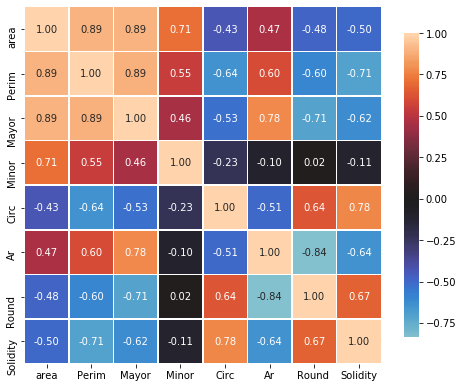

In [65]:
correlation_heatmap(numerics)

From this heatmap with correlation values, we could find some of these features have very strong positive/negative correlation. This will influence a lot for modelling. To solve it, PCA will be a good choice. We would like to apply it later. 

**Outliers**

Next step is to check outliers. Use the boxplot to show.

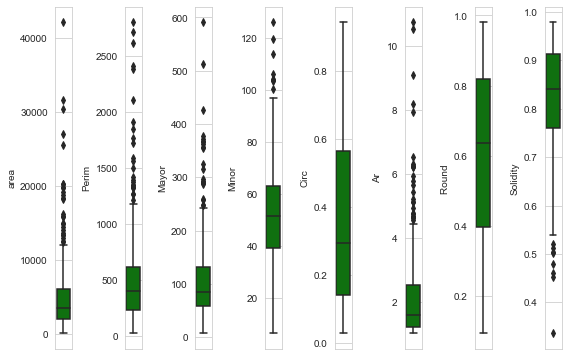

In [67]:
l = numerics.columns.values
number_of_columns=8
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(numerics[l[i]],color='green',orient='v')
    plt.tight_layout()

From above box plots for each numerical feature, there exists some outliers for "area", "Perim", "Mayor", "Minor" and "Ar". Consider we could not directly drop off all the outliers, so it is needed to choose multiple models to compare.

**Distributions**

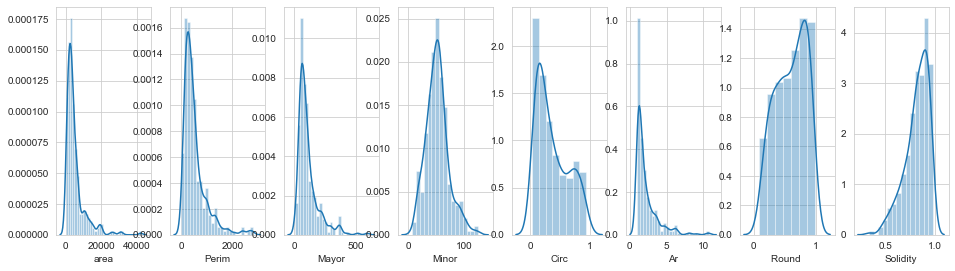

In [68]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(numerics[l[i]],kde=True) 

- "Minor" and "Round" is similar to be bell-shaped distribution. And "Minor" looks to be normal distribution.  
- "Area", "Perim", "Mayor", "Circ" and "Ar" are right skewed, "Solidity" is left skewed

These two parts are based on the code:
<https://nbviewer.jupyter.org/github/PBPatil/Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb>

# Conclusion

Above are some basic analysis for our data. It helps us to understand more details about each feature and what kind of issues we might need to consider when we build models.  
Then we will do the data manipulation before building models.